 MNIST NN모델의 prediction 실험
 

In [36]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. 데이터 읽기 및 전처리 함수 정의
def load_and_preprocess_data(file_path):
    with open(file_path, "r") as fp:
        lines = fp.readlines()

    # 데이터를 저장할 리스트 초기화
    x_data = []
    y_data = []

    for i in range(0, len(lines), 29):  # 한 예제는 29줄로 이루어짐
        label = int(lines[i].strip())
        y_data.append(label)

        image_lines = lines[i + 1:i + 29]  # 이미지 데이터는 1부터 28번째 줄까지
        image = []
        for line in image_lines:
            image += [float(pixel) / 255 for pixel in line.split()]  # 정규화
        x_data.append(image)

    return np.array(x_data), np.array(y_data)

In [ ]:
# 2. 데이터 로드
train_data_path = "/content/drive/MyDrive/인공지능실습/mnist_train.txt"
test_data_path = "/content/drive/MyDrive/인공지능실습/mnist_test.txt"

x_train, y_train = load_and_preprocess_data(train_data_path)
x_test, y_test = load_and_preprocess_data(test_data_path)

# 3. 데이터를 훈련 및 검증 세트로 나눔 (80% 학습, 20% 검증)
split_index = int(0.8 * len(x_train))
x_val, y_val = x_train[split_index:], y_train[split_index:]
x_train, y_train = x_train[:split_index], y_train[:split_index]

In [ ]:
# 4. 모델 정의
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 6. 모델 훈련
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))
# 훈련(검증)의 마지막 epoch 출력
last_epoch = history.epoch[-1] + 1  # 0부터 시작하는 인덱스를 실제 epoch로 변환
print(f"훈련(검증)의 마지막 epoch: {last_epoch}")

# pred의 shape 출력
print(f"pred의 shape: {predictions.shape}")


Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1398 - val_accuracy: 0.9800
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.1584 - val_accuracy: 0.9777
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.1407 - val_accuracy: 0.9787
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.1604 - val_accuracy: 0.9768
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.1612 - val_accuracy: 0.9786
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.1777 - val_accuracy: 0.9771
Epoch 7/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.1486 - val_a

In [ ]:
# 테스트 데이터 로드 및 전처리
x_test, y_test = load_and_preprocess_data(test_data_path)

# 테스트 데이터 중 처음 1,600개 데이터만 사용
x_test_subset = x_test[:1600]
y_test_subset = y_test[:1600]

# 모델 예측 수행
predictions = model.predict(x_test_subset, batch_size=16, verbose=2)

100/100 - 0s - 181ms/epoch - 2ms/step


In [ ]:
# 오분류된 예제를 찾고 가장 나쁜 예제 3개를 선택
wrong_examples = []
worst_examples = []
worst_probabilities = []

for i in range(len(x_test_subset)):
    true_label = y_test_subset[i]
    predicted_label = np.argmax(predictions[i])

    if true_label != predicted_label:
        wrong_examples.append(i)
        predicted_probability = predictions[i][true_label]
        worst_examples.append((i, predicted_probability))
        worst_probabilities.append(predicted_probability)

# 오분류된 예제 중 가장 나쁜 예제 3개 선택
sorted_indices = np.argsort(worst_probabilities)[-3:]  # 가장 나쁜 3개 선택
worst_examples = [worst_examples[i] for i in sorted_indices]


예제 1
예제번호: 1270
정답레이블: 4
예측레이블: 9
이 예제의 tg_prob: 0.4275


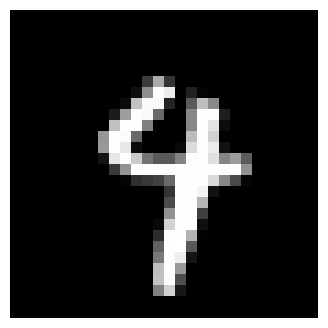


예제 2
예제번호: 951
정답레이블: 5
예측레이블: 9
이 예제의 tg_prob: 0.4316


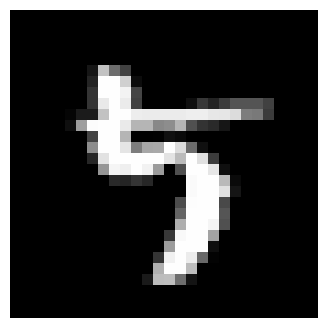


예제 3
예제번호: 432
정답레이블: 4
예측레이블: 5
이 예제의 tg_prob: 0.4611


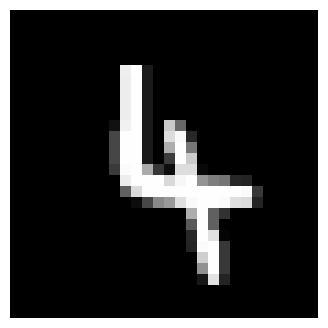

In [ ]:
# 가장 나쁜 예제 3개에 대한 정보와 이미지 출력
for i, (example_index, predicted_probability) in enumerate(worst_examples):
    true_label = y_test_subset[example_index]
    predicted_label = np.argmax(predictions[example_index])

    print(f"\n예제 {i + 1}")
    print(f"예제번호: {example_index}")
    print(f"정답레이블: {true_label}")
    print(f"예측레이블: {predicted_label}")
    print(f"이 예제의 tg_prob: {predicted_probability:.4f}")

    # 이미지 출력
    plt.figure(figsize=(4, 4))
    plt.imshow(x_test_subset[example_index].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()